In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
df=pd.get_dummies(df,columns=['State'])

In [6]:
X=df.drop('Profit',axis=1)
Y=df['Profit']

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
print(X.shape)
print(x_train.shape)

(50, 6)
(40, 6)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0


In [14]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,-0.350065,-0.785471,0.101197,-0.816497,1.732051,-0.733799
1,-0.555303,-1.481174,0.027350,-0.816497,-0.577350,1.362770
2,0.079358,0.801334,-0.551521,-0.816497,1.732051,-0.733799
3,-0.546382,1.325058,0.070117,1.224745,-0.577350,-0.733799
4,0.434854,-0.355987,0.751485,-0.816497,1.732051,-0.733799


In [15]:
np.round(x_train.describe())

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,40.0,40.0,40.0,40.0,40.0,40.0
mean,71663.0,123391.0,202141.0,0.0,0.0,0.0
std,46778.0,26217.0,125033.0,0.0,0.0,0.0
min,0.0,51283.0,0.0,0.0,0.0,0.0
25%,36107.0,112570.0,122572.0,0.0,0.0,0.0
50%,71431.0,125605.0,208158.0,0.0,0.0,0.0
75%,99624.0,145191.0,297502.0,1.0,0.0,1.0
max,165349.0,157694.0,471784.0,1.0,1.0,1.0


In [16]:
np.round(x_train_scaled.describe(),1)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,40.0,40.0,40.0,40.0,40.0,40.0
mean,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-2.8,-1.6,-0.8,-0.6,-0.7
25%,-0.8,-0.4,-0.6,-0.8,-0.6,-0.7
50%,-0.0,0.1,0.0,-0.8,-0.6,-0.7
75%,0.6,0.8,0.8,1.2,0.0,1.4
max,2.0,1.3,2.2,1.2,1.7,1.4


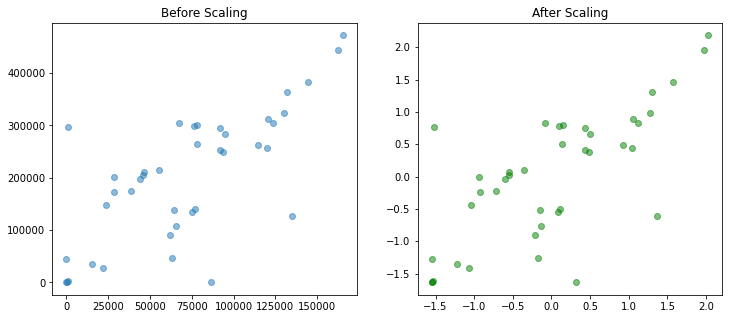

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

# before scaling
ax[0].scatter(x_train['R&D Spend'],x_train['Marketing Spend'],alpha=0.5)
ax[0].set_title('Before Scaling')

# after scaling
ax[1].scatter(x_train_scaled['R&D Spend'],x_train_scaled['Marketing Spend'],color='green',alpha=0.5)
ax[1].set_title('After Scaling')

plt.show()

Text(0.5, 1.0, 'After Scaling')

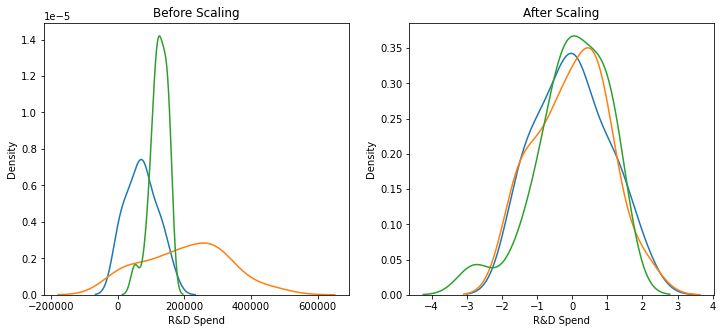

In [18]:
fig,ax=plt.subplots(1,2, figsize=(12,5))

# before scaling
sns.kdeplot(x_train['R&D Spend'],ax=ax[0])
sns.kdeplot(x_train['Marketing Spend'],ax=ax[0])
sns.kdeplot(x_train['Administration'],ax=ax[0])
ax[0].set_title('Before Scaling')

# after scaling
sns.kdeplot(x_train_scaled['R&D Spend'],ax=ax[1])
sns.kdeplot(x_train_scaled['Marketing Spend'],ax=ax[1])
sns.kdeplot(x_train_scaled['Administration'],ax=ax[1])
ax[1].set_title('After Scaling')

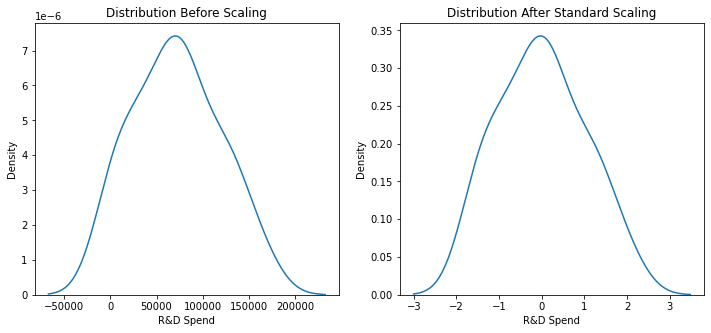

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

# before scaling
ax[0].set_title('Distribution Before Scaling')
sns.kdeplot(x_train['R&D Spend'], ax=ax[0])

# after scaling
ax[1].set_title('Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['R&D Spend'], ax=ax[1])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test)
y_scaled_pred=lr.predict(x_test_scaled)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_test,y_pred)

2.04992200104914e+19

In [26]:
mean_squared_error(y_test,y_scaled_pred)

83502864.03257689